In [144]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, validation_curve, StratifiedShuffleSplit,KFold
from sklearn.metrics import accuracy_score,fbeta_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
import re

In [151]:
train_df = pd.read_csv(filepath_or_buffer="titanic_train.csv")
test_df = pd.read_csv(filepath_or_buffer="titanic_test.csv")
combine = [train_df, test_df]

In [146]:
def nullc(column):
    return train_df[column].isnull().sum()

In [141]:
nullc('Sex')

0

In [137]:
train_df['Age'].median()

28.0

In [152]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

for dataset in combine:
    original_dataset = dataset.copy()
    # Cabin is NaN
    dataset['Has_Cabin'] = dataset['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
    dataset['FamilySize'] = dataset['SibSp'] + train_df['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
    dataset['Title'] = dataset['Name'].apply(get_title)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
    
    

In [153]:
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train_df = train_df.drop(drop_columns, axis = 1)
test_df  = test_df.drop(drop_columns, axis = 1)

In [154]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,22,0,7.2500,S,0,2,0,Mr
1,1,1,0,38,0,71.2833,C,1,2,0,Mrs
2,1,3,0,26,0,7.9250,S,0,1,1,Miss


In [100]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [156]:
X_train = pd.get_dummies(train_df.drop("Survived", 1)).copy().values
y_train = train_df["Survived"]

,Pclass,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,1,22,0,7.2500,0,2,0,0,0,1,0,0,1,0,0
1,1,0,38,0,71.2833,1,2,0,1,0,0,0,0,0,1,0
2,3,0,26,0,7.9250,0,1,1,0,0,1,0,1,0,0,0
3,1,0,35,0,53.1000,1,2,0,0,0,1,0,0,0,1,0
4,3,1,35,0,8.0500,0,1,1,0,0,1,0,0,1,0,0
5,3,1,40,0,8.4583,0,1,1,0,1,0,0,0,1,0,0
6,1,1,54,0,51.8625,1,1,1,0,0,1,0,0,1,0,0
7,3,1,2,1,21.0750,0,5,0,0,0,1,1,0,0,0,0
8,3,0,27,2,11.1333,0,3,0,0,0,1,0,0,0,1,0
9,2,0,14,0,30.0708,0,2,0,1,0,0,0,0,0,1,0


In [103]:
train_df['Age'].value_counts()

29.699118    891
Name: Age, dtype: int64

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(train.drop)

In [169]:
def make_complexity_curve(clf, x, y,param_name,param_range,cv,clf_name,dataset_name):
    print("Complexity curve")
    train_scores, validation_scores = validation_curve(clf,x,y,param_name,param_range,cv=cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    
    print(f"train_scores_mean: {train_scores_mean}")
    print(f"validation_scores_mean: {validation_scores_mean}")
    best = max(list(zip(param_range, validation_scores_mean)), key = lambda t: t[1])[0]
    print(f"best {param_name}: {best}")
    title = 'Model Complexity: {} - {} ({})'.format(clf_name, dataset_name, param_name)
    plt.close()
    plt.figure()
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("accuracy")
    plt.plot(param_range,train_scores_mean, label="train")
    plt.plot(param_range, validation_scores_mean, label="validation")
    plt.legend()
    plt.draw()
    print("Complexity curve complete")

Complexity curve
train_scores_mean: [0.7822668  0.80433912 0.83165116 0.8457442  0.85734038 0.87143016
 0.89163433 0.90946679 0.92592814 0.94051807 0.95323892 0.96496009
 0.97493625 0.98241739 0.98615804 0.99077182 0.99239292 0.99314121
 0.99339058 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996 0.99363996
 0.99363996 0.99363996 0.9

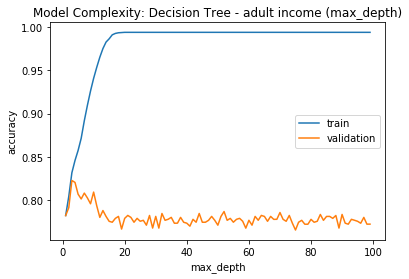

In [170]:
max_depths = list(np.arange(1, 100, 1))
make_complexity_curve(DecisionTreeClassifier(), X_train, y_train,"max_depth",max_depths,10,"Decision Tree","adult income")

In [78]:
train_scores, validation_scores = validation_curve(DecisionTreeClassifier(),X_train,y_train,"max_depth",max_depths,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

In [177]:
X_train.columns.values


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [180]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
feature_importances = sorted(list(zip(pd.get_dummies(train_df.drop("Survived", 1)).columns.values, clf.feature_importances_)), key=lambda tup: tup[1], reverse=True)
print("feature importance")
for fi in feature_importances[:10]:
    print(fi)
print("")

feature importance
('Title_Mr', 0.6631309850224849)
('FamilySize', 0.15512762313919815)
('Fare', 0.13242828842708668)
('Pclass', 0.04585166180067775)
('Age', 0.0034614416105523027)
('Sex', 0.0)
('Parch', 0.0)
('Has_Cabin', 0.0)
('IsAlone', 0.0)
('Embarked_C', 0.0)



array([0.77947   , 0.79073774, 0.74735141, 0.76849899, 0.77409339,
       0.76425352, 0.77550184, 0.78113523, 0.783923  , 0.78244504,
       0.78246488, 0.77685078, 0.78249471, 0.78956665, 0.78815806,
       0.78811838, 0.77689004, 0.77828864, 0.79091559, 0.78110554,
       0.78671978, 0.78110554, 0.78111553, 0.79091559, 0.79096525,
       0.78670008, 0.79230434, 0.79096525, 0.78392258, 0.79376246,
       0.78949729, 0.78811838, 0.79376246, 0.78532118, 0.78951699,
       0.78252398, 0.78671978, 0.78391273, 0.78528164, 0.78391273,
       0.7895765 , 0.78529149, 0.78814821, 0.78810854, 0.78534116,
       0.78537085, 0.78109569, 0.78389289, 0.78670993])

In [49]:
test_df.shape

(38, 1)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
train_df[["Sex", "Survived"]].groupby(["Sex"]).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [18]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"]).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [24]:
def preprocess_data(data):
    new_dataFrame = pd.DataFrame()

    new_dataFrame['Age'] = data.Age.fillna(data.Age.mean())
    new_dataFrame['Sex'] = pd.Series([1 if s == 'male' else 0 for s in data.Sex], name = 'Sex')

    return new_dataFrame

In [27]:
train_df = preprocess_data(train_df)

In [33]:
train_df.shape
train_df

,Age,Sex
0,22.000000,1
1,38.000000,0
2,26.000000,0
3,35.000000,0
4,35.000000,1
5,29.699118,1
6,54.000000,1
7,2.000000,1
8,27.000000,0
9,14.000000,0


In [29]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit()